In [1]:
import argparse
import numpy as np
import pandas as pd
import pickle
import copy
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets,transforms
from torch import optim
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, TensorDataset
import os
import random
from tqdm import tqdm
import torch.nn.functional as F
from collections import Counter
from itertools import islice
import itertools

In [2]:
def intToRoman(num):
 
     # Storing roman values of digits from 0-9 
     # when placed at different places
     m = [ "", "m", "mm", "mmm" ]
     c = [ "", "c", "cc", "ccc", "cd", "d", 
           "dc", "dcc", "dccc", "cm "]
     x = [ "", "x", "xx", "xxx", "xl", "l", 
           "lx", "lxx", "lxxx", "xc" ]
     i = [ "", "i", "ii", "iii", "iv", "v", 
           "vi", "vii", "viii", "ix"]
          
     # Converting to roman
     thousands = m[num // 1000]
     hundereds = c[(num % 1000) // 100]
     tens =  x[(num % 100) // 10]
     ones = i[num % 10]
          
     ans = (thousands + hundereds +
                 tens + ones)
          
     return ans;

In [3]:
for i in range(1,16):
    print(intToRoman(i))

i
ii
iii
iv
v
vi
vii
viii
ix
x
xi
xii
xiii
xiv
xv


In [4]:
marker = itertools.cycle(('o', 'v', '^', 's', '8', '<', '>','p'))
#marker = itertools.cycle(('o', 'v', '^', '>','p'))
from matplotlib.lines import Line2D

In [7]:
with open('fm_acc_geomed', 'rb') as f:
    acc_geomed = pickle.load(f)

In [8]:
with open('fm_acc_ae', 'rb') as f:
    acc_ae = pickle.load(f)

In [9]:
with open('fm_acc_moat', 'rb') as f:
    acc_moat = pickle.load(f)

In [10]:
with open('fm_acc_fedavg', 'rb') as f:
    acc_fedavg = pickle.load(f)

In [11]:
with open('fm_acc_trimmedMean', 'rb') as f:
    acc_trimmedMean = pickle.load(f)

In [5]:
with open('fm_acc_krum', 'rb') as f:
    acc_krum = pickle.load(f)

In [13]:
with open('fm_asr_geomed', 'rb') as f:
    asr_geomed = pickle.load(f)

In [14]:
with open('fm_asr_ae', 'rb') as f:
    asr_ae = pickle.load(f)

In [15]:
with open('fm_asr_moat', 'rb') as f:
    asr_moat = pickle.load(f)

In [16]:
with open('fm_asr_fedavg', 'rb') as f:
    asr_fedavg = pickle.load(f)

In [17]:
with open('fm_asr_trimmedMean', 'rb') as f:
    asr_trimmedMean = pickle.load(f)

In [6]:
with open('fm_asr_krum', 'rb') as f:
    asr_krum = pickle.load(f)

In [19]:
with open('fm_rounds_geomed', 'rb') as f:
    rounds_geomed = pickle.load(f)

In [20]:
with open('fm_rounds_ae', 'rb') as f:
    rounds_ae = pickle.load(f)

In [21]:
with open('fm_rounds_moat', 'rb') as f:
    rounds_moat = pickle.load(f)

In [22]:
with open('fm_rounds_fedavg', 'rb') as f:
    rounds_fedavg = pickle.load(f)

In [23]:
with open('fm_rounds_trimmedMean', 'rb') as f:
    rounds_trimmedMean = pickle.load(f)

In [7]:
with open('fm_rounds_krum', 'rb') as f:
    rounds_krum = pickle.load(f)

In [25]:
with open('fm_tmcr_geomed', 'rb') as f:
    tmcr_geomed = pickle.load(f)

In [26]:
with open('fm_tmcr_ae', 'rb') as f:
    tmcr_ae = pickle.load(f)

In [27]:
with open('fm_tmcr_moat', 'rb') as f:
    tmcr_moat = pickle.load(f)

In [28]:
with open('fm_tmcr_fedavg', 'rb') as f:
    tmcr_fedavg = pickle.load(f)

In [29]:
with open('fm_tmcr_trimmedMean', 'rb') as f:
    tmcr_trimmedMean = pickle.load(f)

In [9]:
with open('fm_tmcr_krum', 'rb') as f:
    tmcr_krum = pickle.load(f)

In [31]:
with open('fm_mcr_geomed', 'rb') as f:
    mcr_geomed = pickle.load(f)

In [32]:
with open('fm_mcr_ae', 'rb') as f:
    mcr_ae = pickle.load(f)

In [33]:
with open('fm_mcr_moat', 'rb') as f:
    mcr_moat = pickle.load(f)

In [34]:
with open('fm_mcr_fedavg', 'rb') as f:
    mcr_fedavg = pickle.load(f)

In [35]:
with open('fm_mcr_trimmedMean', 'rb') as f:
    mcr_trimmedMean = pickle.load(f)

In [8]:
with open('fm_mcr_krum', 'rb') as f:
    mcr_krum = pickle.load(f)

In [37]:
len(acc_ae[0])

50

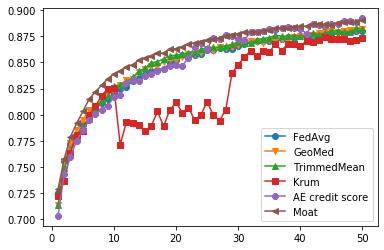

In [38]:
plt.plot(rounds_fedavg[0],acc_fedavg[0],marker=next(marker),label='FedAvg')
plt.plot(rounds_geomed[0],acc_geomed[0],marker=next(marker),label='GeoMed')
plt.plot(rounds_trimmedMean[0],acc_trimmedMean[0],marker=next(marker),label='TrimmedMean')
plt.plot(rounds_krum[0],acc_krum[0],marker=next(marker),label='Krum')
plt.plot(rounds_ae[0][:50],acc_ae[0][:50],marker=next(marker),label='AE credit score')
plt.plot(rounds_moat[0],acc_moat[0],marker=next(marker),label='Moat')
plt.legend()

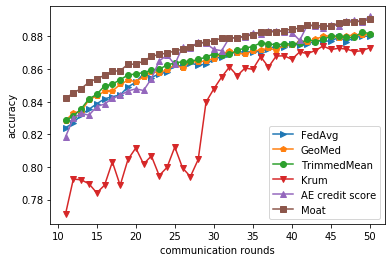

In [40]:
plt.plot(rounds_fedavg[0][10:],acc_fedavg[0][10:],marker=next(marker),label='FedAvg')
plt.plot(rounds_geomed[0][10:],acc_geomed[0][10:],marker=next(marker),label='GeoMed')
plt.plot(rounds_trimmedMean[0][10:],acc_trimmedMean[0][10:],marker=next(marker),label='TrimmedMean')
plt.plot(rounds_krum[0][10:],acc_krum[0][10:],marker=next(marker),label='Krum')
plt.plot(rounds_ae[0][10:],acc_ae[0][10:],marker=next(marker),label='AE credit score')
plt.plot(rounds_moat[0][10:],acc_moat[0][10:],marker=next(marker),label='Moat')
plt.xlabel('communication rounds')
plt.ylabel('accuracy')
plt.legend()
#plt.savefig('compare_acc')

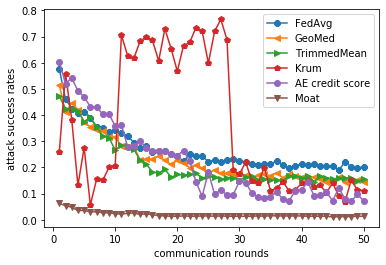

In [41]:
plt.plot(rounds_fedavg[0],asr_fedavg[0],marker=next(marker),label='FedAvg')
plt.plot(rounds_geomed[0],asr_geomed[0],marker=next(marker),label='GeoMed')
plt.plot(rounds_trimmedMean[0],asr_trimmedMean[0],marker=next(marker),label='TrimmedMean')
plt.plot(rounds_krum[0],asr_krum[0],marker=next(marker),label='Krum')
plt.plot(rounds_ae[0][:50],asr_ae[0][:50],marker=next(marker),label='AE credit score')
plt.plot(rounds_moat[0],asr_moat[0],marker=next(marker),label='Moat')
plt.xlabel('communication rounds')
plt.ylabel('attack success rates')
plt.legend()
#plt.savefig('compare_asr')

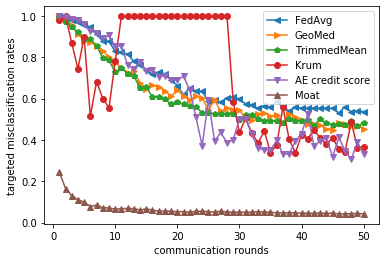

In [43]:
plt.plot(rounds_fedavg[0],tmcr_fedavg[0],marker=next(marker),label='FedAvg')
plt.plot(rounds_geomed[0],tmcr_geomed[0],marker=next(marker),label='GeoMed')
plt.plot(rounds_trimmedMean[0],tmcr_trimmedMean[0],marker=next(marker),label='TrimmedMean')
plt.plot(rounds_krum[0],tmcr_krum[0],marker=next(marker),label='Krum')
plt.plot(rounds_ae[0][:50],tmcr_ae[0][:50],marker=next(marker),label='AE credit score')
plt.plot(rounds_moat[0],tmcr_moat[0],marker=next(marker),label='Moat')
plt.xlabel('communication rounds')
plt.ylabel('targeted misclassification rates')
plt.legend()
#plt.savefig('compare_tmcr')

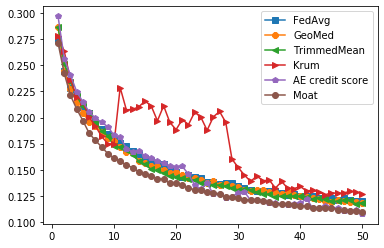

In [44]:
plt.plot(rounds_fedavg[0],mcr_fedavg[0],marker=next(marker),label='FedAvg')
plt.plot(rounds_geomed[0],mcr_geomed[0],marker=next(marker),label='GeoMed')
plt.plot(rounds_trimmedMean[0],mcr_trimmedMean[0],marker=next(marker),label='TrimmedMean')
plt.plot(rounds_krum[0],mcr_krum[0],marker=next(marker),label='Krum')
plt.plot(rounds_ae[0][:50],mcr_ae[0][:50],marker=next(marker),label='AE credit score')
plt.plot(rounds_moat[0],mcr_moat[0],marker=next(marker),label='Moat')
plt.legend()

# Plot accuracy all % attackers

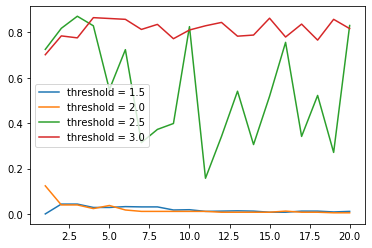

In [13]:
plt.plot(rounds[0],asr[0],label='threshold = 1.5')
plt.plot(rounds[0],asr[1],label='threshold = 2.0')
plt.plot(rounds[0],asr[2],label='threshold = 2.5')
plt.plot(rounds[0],asr[3],label='threshold = 3.0')
#for i in range(len(rounds)):
#    plt.plot(rounds[i],asr[i],label='threshold = {}'.format(i*0.1+1.7))
plt.legend()

# Plot attack success rate

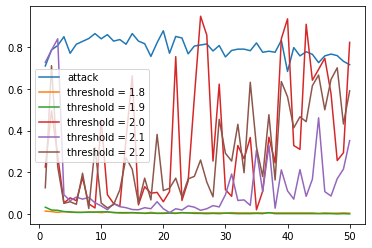

In [14]:
plt.plot(rounds[0],asr[0],label='attack')
for i in range(1,len(rounds)):
    plt.plot(rounds[i],asr[i],label='threshold = {}'.format(i*0.1+1.7))
plt.legend()

# Plot misclassification rate

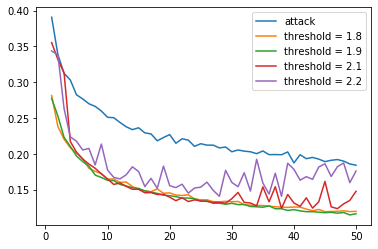

In [18]:
plt.plot(rounds[0],mcr[0],label='attack')
for i in range(1,len(rounds)):
    if i ==3:
        continue
    plt.plot(rounds[i],mcr[i],label='threshold = {}'.format(i*0.1+1.7))
plt.legend()

# Plot targeted misclassification rate

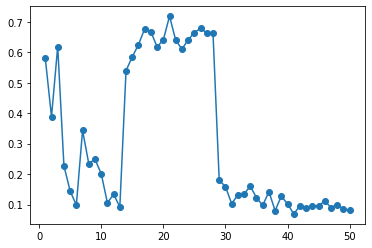

In [10]:
plt.plot(rounds_krum[0],asr_krum[0],marker=next(marker),label='Krum')



# Rounds 20-50 without marker

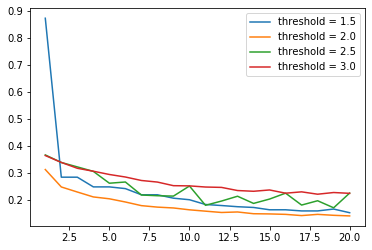

In [14]:
plt.plot(rounds[0],mcr[0],label='threshold = 1.5')
plt.plot(rounds[0],mcr[1],label='threshold = 2.0')
plt.plot(rounds[0],mcr[2],label='threshold = 2.5')
plt.plot(rounds[0],mcr[3],label='threshold = 3.0')
#for i in range(len(rounds)):
#    plt.plot(rounds[i],asr[i],label='threshold = {}'.format(i*0.1+1.7))
plt.legend()

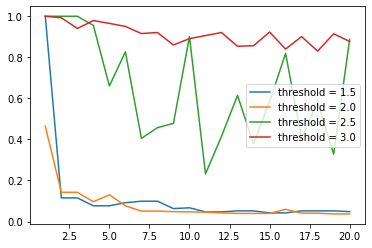

In [15]:
plt.plot(rounds[0],t_mcr[0],label='threshold = 1.5')
plt.plot(rounds[0],t_mcr[1],label='threshold = 2.0')
plt.plot(rounds[0],t_mcr[2],label='threshold = 2.5')
plt.plot(rounds[0],t_mcr[3],label='threshold = 3.0')
#for i in range(len(rounds)):
#    plt.plot(rounds[i],asr[i],label='threshold = {}'.format(i*0.1+1.7))
plt.legend()